In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

data= pd.read_csv('D:\SEM 8\Project\DS\Prostate_Cancer.csv')

X=data
y=data

print(X)
print(y)
print(X.isna().sum())

     id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242              0.079  
1         0.079  

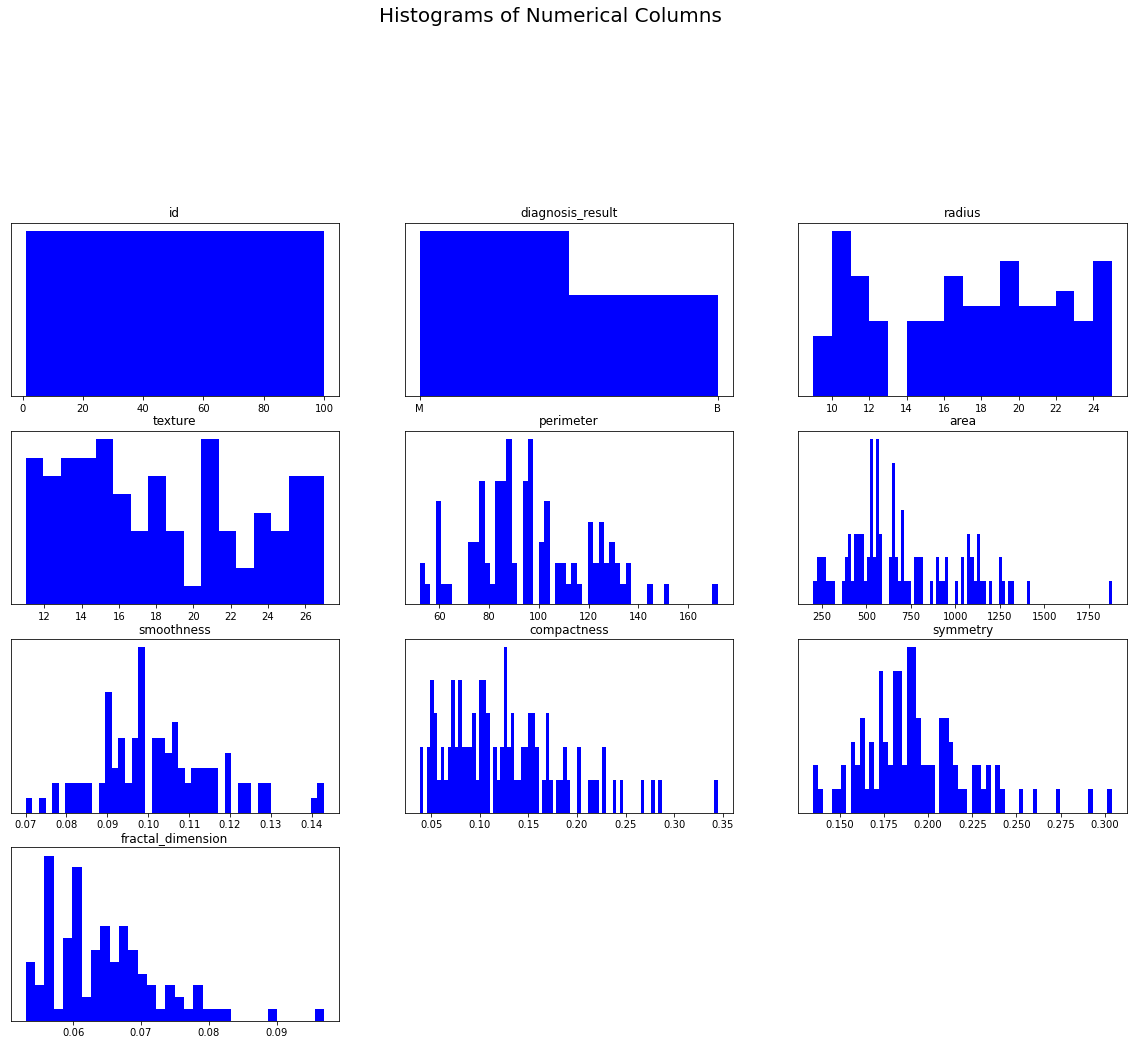

In [2]:
ig = plt.figure(figsize=(20, 30))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, data.shape[1] + 1):
    plt.subplot(8, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data.columns.values[i - 1])

    vals = np.size(data.iloc[:, i - 1].unique())
    
    plt.hist(data.iloc[:, i - 1], bins=vals, color='Blue')

<AxesSubplot:title={'center':'Heat Map\n'}>

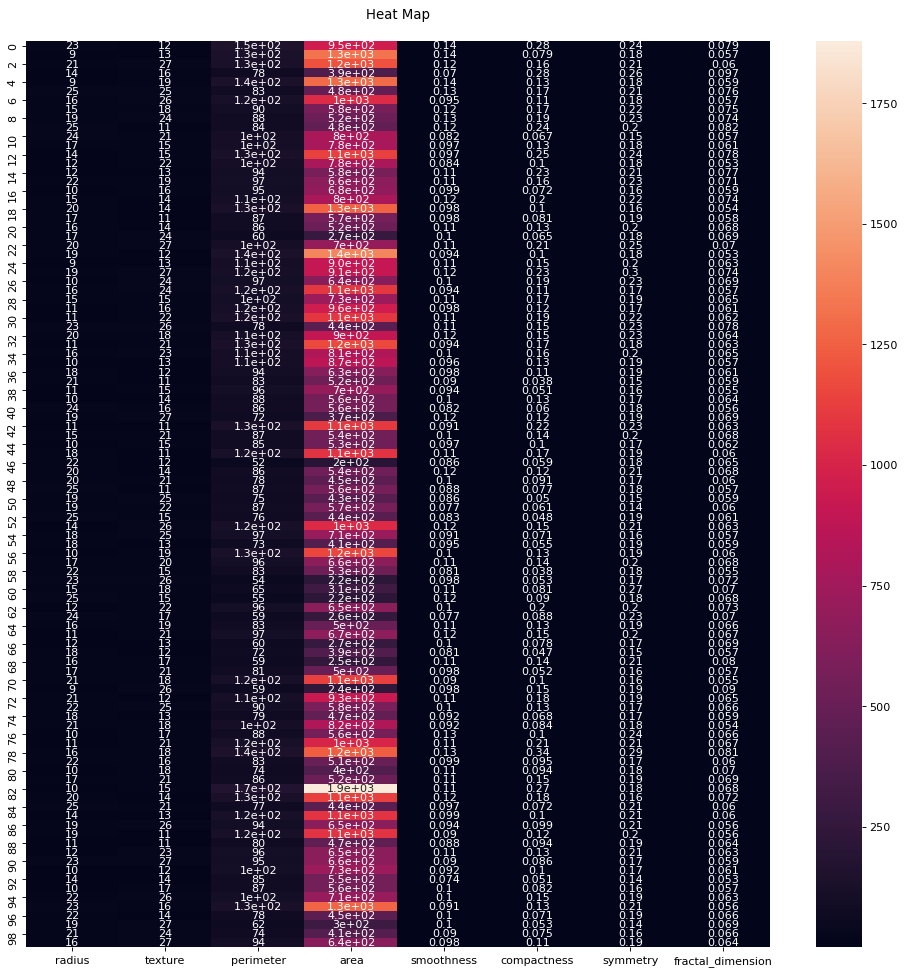

In [21]:
plt.figure(figsize=(15, 15), dpi=80)
plt.title('Heat Map\n')
sn.heatmap(X, annot=True) 

C:\Users\Merlyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


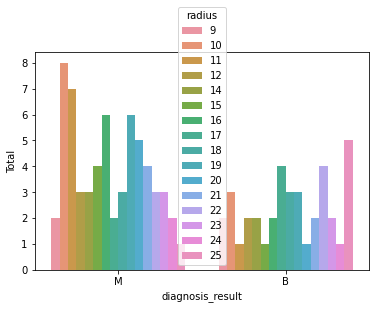

In [5]:
plot = sn.countplot('diagnosis_result',hue='radius', data=data)
plt.ylabel('Total')
plt.show()

In [6]:
X=data.drop(data.columns[[0,1]], axis = 1)
y=data['diagnosis_result']
print(X)
print(y)

print(X.isna().any())
print(y.isna().any())

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2               0.060  
3  

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)

[[ 5.89179983e-01 -8.39878584e-01 -4.56273525e-01 -5.29961296e-01
   9.65791580e-01 -6.28669662e-02  5.95641991e-01  4.30679033e-01]
 [-2.52505707e-01 -8.39878584e-01 -4.56273525e-01 -5.75389795e-01
   4.11435875e-01  3.30878770e-03  9.95966114e-02  4.30679033e-01]
 [-4.62927130e-01 -8.39878584e-01  4.36987214e-01  2.69580283e-01
   1.03508604e+00  1.24410417e+00  6.88650500e-01  1.19917693e+00]
 [ 7.99601406e-01 -1.22938749e+00  6.80603779e-01  6.63293940e-01
   3.42141412e-01  9.29769342e-01 -2.44147335e-02  4.64300816e-02]
 [ 5.89179983e-01 -8.39878584e-01  1.33024795e+00  1.66574948e+00
  -2.81508756e-01 -3.93745736e-01 -1.10951400e+00 -1.36248274e+00]
 [-4.62927130e-01  5.23402596e-01 -4.15670764e-01 -4.99675630e-01
   1.34258022e-01  2.84555742e-01  9.95966114e-02  4.30679033e-01]
 [-2.52505707e-01 -2.55615221e-01 -1.55254807e+00 -1.39007421e+00
   3.42141412e-01  2.34923926e-01  5.33636319e-01  1.96767484e+00]
 [-1.09419140e+00 -1.03463304e+00 -1.51194531e+00 -1.33556001e+00
   

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.75
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       1.00      0.62      0.76        13

    accuracy                           0.75        20
   macro avg       0.79      0.81      0.75        20
weighted avg       0.85      0.75      0.75        20



Text(33.0, 0.5, 'True Labels')

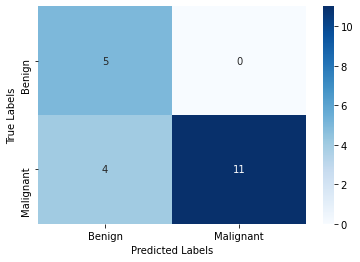

In [9]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [10]:
classifier.predict([[-1.21134160e+00, 5.27879226e-01,  1.51152744e+00,  1.70521441e+00,-5.43011642e-01,  8.00956940e-01, -2.59488187e-01, -2.15396728e-01]])

array([1])

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 3)
kmeans.fit(X_train, y_train)
y_kmeans = kmeans.predict(X_test)
cm =confusion_matrix(y_test, y_kmeans)
print(accuracy_score(y_test, y_kmeans))
print(classification_report(y_test, y_kmeans))

0.2
              precision    recall  f1-score   support

           0       0.09      0.14      0.11         7
           1       0.33      0.23      0.27        13

    accuracy                           0.20        20
   macro avg       0.21      0.19      0.19        20
weighted avg       0.25      0.20      0.22        20



Text(33.0, 0.5, 'True Labels')

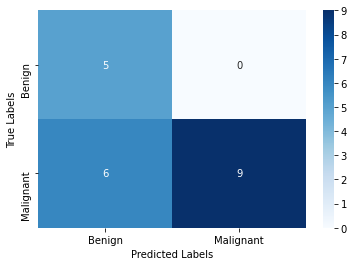

In [12]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [18]:
kmeans.predict([[-1.30490406,0.70736518,1.18963536,1.22990484,0.12423467,1.04470792,0.73602258,-0.37138504]])

array([0])

In [13]:
from sklearn.ensemble import RandomForestClassifier
randomforest= RandomForestClassifier(random_state= 42, verbose=1)
randomforest.fit(X_train,y_train)
random_pred = randomforest.predict(X_test)
cm= confusion_matrix(y_test, random_pred)
print(accuracy_score(y_test, random_pred))
print(classification_report(y_test, random_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.85
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(33.0, 0.5, 'True Labels')

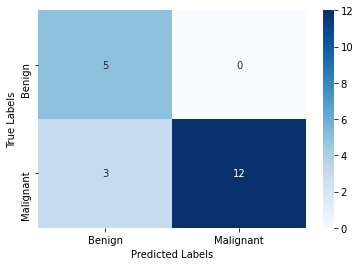

In [15]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [14]:
randomforest.predict([[-1.30490406,0.70736518,1.18963536,1.22990484,0.12423467,1.04470792,0.73602258,-0.37138504]])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1])

In [15]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=42)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.85
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



Text(33.0, 0.5, 'True Labels')

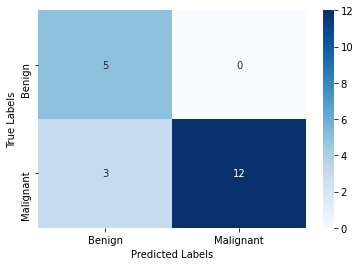

In [18]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [19]:
classifier.predict([[-1.30490406,0.70736518,1.18963536,1.22990484,0.12423467,1.04470792,0.73602258,-0.37138504]])

array([1])

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.91      0.77      0.83        13

    accuracy                           0.80        20
   macro avg       0.79      0.81      0.79        20
weighted avg       0.82      0.80      0.80        20



Text(33.0, 0.5, 'True Labels')

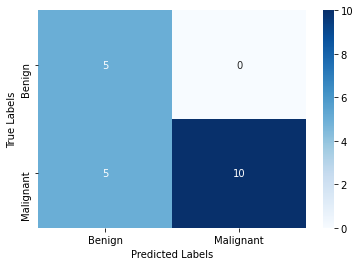

In [21]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [22]:
gnb.predict([[-1.30490406,0.70736518,1.18963536,1.22990484,0.12423467,1.04470792,0.73602258,-0.37138504]])

array([1])

In [17]:
from xgboost import XGBClassifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric= 'error')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20



Text(33.0, 0.5, 'True Labels')

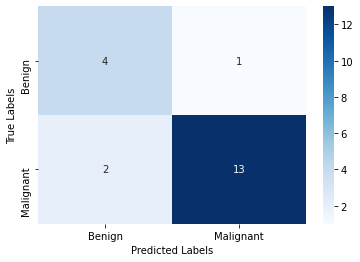

In [24]:
ax= sn.heatmap(cm, annot=True, cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign','Malignant'])
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

In [40]:
classifier.predict([[-1.30490406,0.70736518,1.18963536,1.22990484,0.12423467,1.04470792,0.73602258,-0.37138504]])

array([1])